# Pandas introduction pt3

In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

## Read excel

In [92]:
VP_2 = pd.read_excel('../data_example/VP_2.xls')
VP_1 = pd.read_excel('../data_example/VP_1.xls')

In [93]:
VP_1.head()

,Time,Probe 1,Probe 2,Probe 3,Probe 4,Probe 5,Probe 6,Probe 7,Probe 8,Probe 9,...,Probe 12,Probe 13,Probe 14,Probe 15,Probe 16,Probe 17,Probe 18,Probe 19,Probe 20,Probe 21
0,50,292.255001,292.255001,292.326823,292.416743,292.554047,292.713264,292.909473,293.117124,293.325634,...,293.634062,293.627201,293.620011,293.616779,293.618232,293.624710,293.634862,293.645742,293.659815,293.674697
1,100,287.655583,287.655583,288.984022,290.117454,291.319373,292.165028,292.609740,292.798916,292.867632,...,292.965168,293.008770,293.051171,293.092455,293.124922,293.153146,293.175123,293.199628,293.244628,293.276656
2,150,288.124796,288.124796,288.762105,289.204375,289.607669,290.025754,290.476236,290.952993,291.438280,...,292.548932,292.714100,292.803894,292.852759,292.884445,292.911994,292.945479,292.978187,293.023506,293.064591
3,200,287.660435,287.660435,288.336565,288.736952,289.051633,289.354671,289.697481,290.110825,290.600381,...,292.086841,292.406865,292.600702,292.693882,292.745420,292.782831,292.824307,292.861706,292.916789,292.963453
4,250,287.275018,287.275018,287.851397,288.265106,288.567219,288.820999,289.089438,289.429877,289.886126,...,291.540230,291.976199,292.283181,292.455589,292.548872,292.604147,292.652649,292.696538,292.764584,292.818727


In [80]:
# to read a xls file you must install some libraries
#!conda install xlrd

In [106]:
probe_1_1 = VP_1[['Time','Probe 1']].set_index('Time')
probe_1_1.head()

,Probe 1
Time,
50,292.255001
100,287.655583
150,288.124796
200,287.660435
250,287.275018


In [105]:
probe_1_2 =VP_2[['Time','Probe 1']].set_index('Time')
probe_1_2.head()

,Probe 1
Time,
50,286.719286
100,284.593707
150,283.781362
200,283.278204
250,284.446281


In [135]:
VP_0 = probe_1_1.join(probe_1_2, how = 'outer', lsuffix=' VP1', rsuffix=' VP2')


In [136]:
VP_0.describe().T

,count,mean,std,min,25%,50%,75%,max
Probe 1 VP1,100.0,282.236185,2.045805,279.861618,281.024467,281.715948,282.552863,292.255001
Probe 1 VP2,100.0,281.646577,1.337750,278.180517,280.887342,281.694376,282.287850,286.719286


In [131]:
VP_0.reset_index(inplace = True)

In [137]:
VP_0.head()

,Probe 1 VP1,Probe 1 VP2
Time,,
50,292.255001,286.719286
100,287.655583,284.593707
150,288.124796,283.781362
200,287.660435,283.278204
250,287.275018,284.446281


In [138]:
for col in VP_0.columns:
    print(col)

Probe 1 VP1
Probe 1 VP2


In [134]:
c_list = VP_0.columns
c_list[1:]

Index(['Probe 1 VP1', 'Probe 1 VP2'], dtype='object')

In [119]:
VP_0[c_list[1:]].var()
    

Probe 1VP1    4.185320
Probe 1VP2    1.789574
dtype: float64

In [139]:
VP_0.agg(['std', 'sum', 'mean', 'median', 'var'])

,Probe 1 VP1,Probe 1 VP2
std,2.045805,1.337750
sum,28223.618492,28164.657707
mean,282.236185,281.646577
median,281.715948,281.694376
var,4.185320,1.789574


C:\Users\ferra\AppData\Local\Temp/ipykernel_7360/3479644059.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


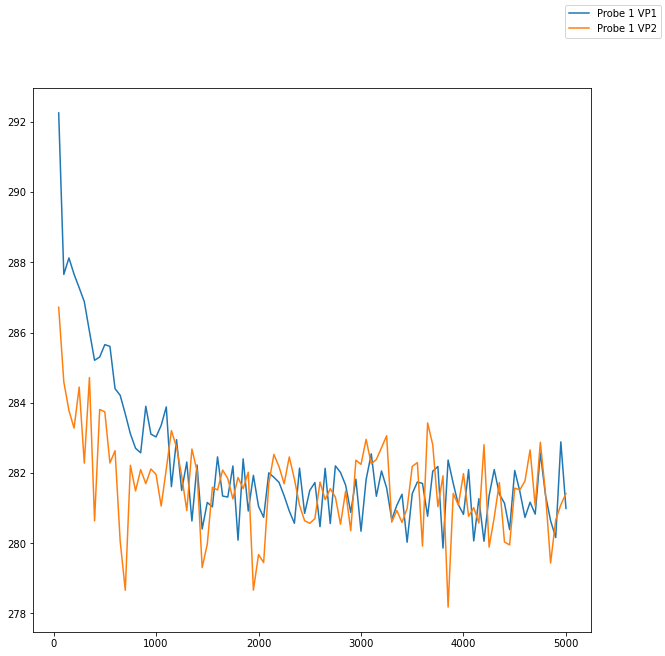

In [143]:
fig, ax = plt.subplots(figsize=(10,10))

ax = plt.plot(VP_0.index, VP_0.iloc[:, :] )
fig.legend(c_list[1:])

fig.show()

C:\Users\ferra\AppData\Local\Temp/ipykernel_7360/2005131704.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


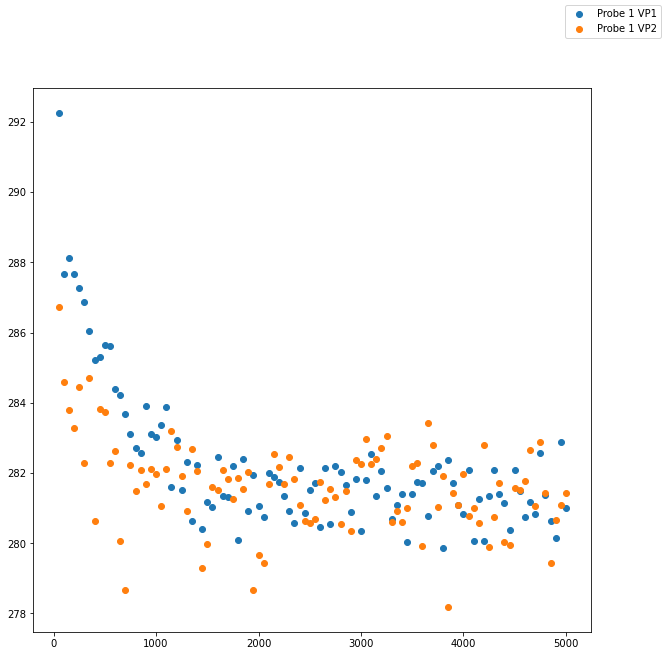

In [149]:
fig, ax = plt.subplots(figsize=(10,10))
#ax.set_aspect('equal')
for col in c_list[1:]:
    ax = plt.scatter(VP_0.index, VP_0[col] )
fig.legend(VP_0.columns)
fig.show()

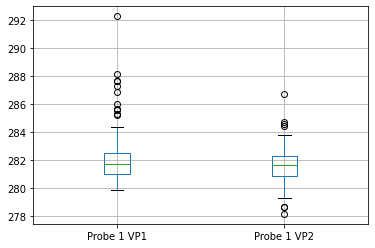

In [145]:
boxplot = VP_0.boxplot()



In [146]:
VP_temp = VP_0

In [147]:
VP_temp

,Probe 1 VP1,Probe 1 VP2
Time,,
50,292.255001,286.719286
100,287.655583,284.593707
150,288.124796,283.781362
200,287.660435,283.278204
250,287.275018,284.446281
...,...,...
4800,281.375157,281.423023
4850,280.640591,279.436387
4900,280.162018,280.660788


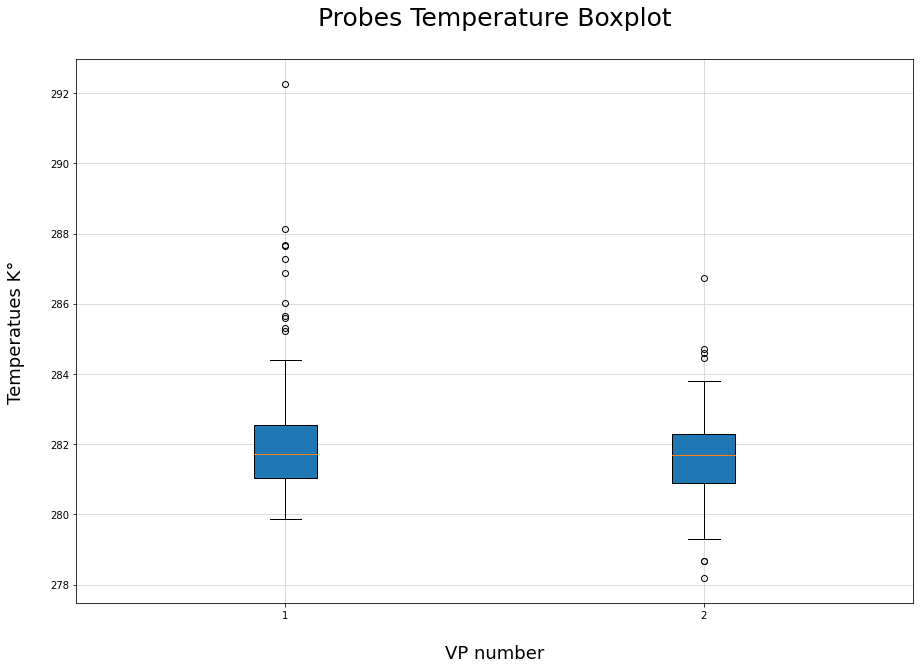

In [148]:
fig, ax = plt.subplots(figsize=(15,10))

plt.title("Probes Temperature Boxplot\n", fontsize=25)

plt.xlabel('\nVP number', fontsize=18)
plt.ylabel('Temperatues K°\n', fontsize=18)

plt.grid(axis='y', color='lightgrey')
plt.grid(axis='x', color='lightgrey')

ax.boxplot(VP_temp, patch_artist=True)
#ax.set_xticklabels(labels =c_list[1:],  rotation=90)
#plt.xticks(rotation=90)

plt.savefig( './output/boxplot' + '.png', format ='png',  bbox_inches='tight')
plt.show()